# Introduction 
The New York City (NYC) Taxi Trip dataset is a rich and extensive collection of data that offers a fascinating glimpse into the bustling transportation network of one of the world's most iconic cities. This dataset is a valuable resource for researchers, urban planners, data scientists, and anyone interested in understanding the dynamics of urban transportation systems. In this analysis, we will explore the NYC Taxi Trip dataset, providing context, background information, and outlining the purpose of our study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import random
import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from haversine import haversine

In [2]:
data=pd.read_csv("train.csv")
data=pd.DataFrame(data)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Data Exploration

**Feature Details:**
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

**Label details:**
* trip_duration - duration of the trip in seconds

**Feature Information**


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**Size of Data**

In [4]:
data.shape

(1458644, 11)

In [5]:
print(f"The number of points in the dataset are {data.shape[0]}")

The number of points in the dataset are 1458644


**Number of Missing Values**

In [6]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no missing values in the given dataset.

In [7]:
print(f"The feature columns are : {data.columns}")

The feature columns are : Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


**Plotting the distribution of every feature on target**

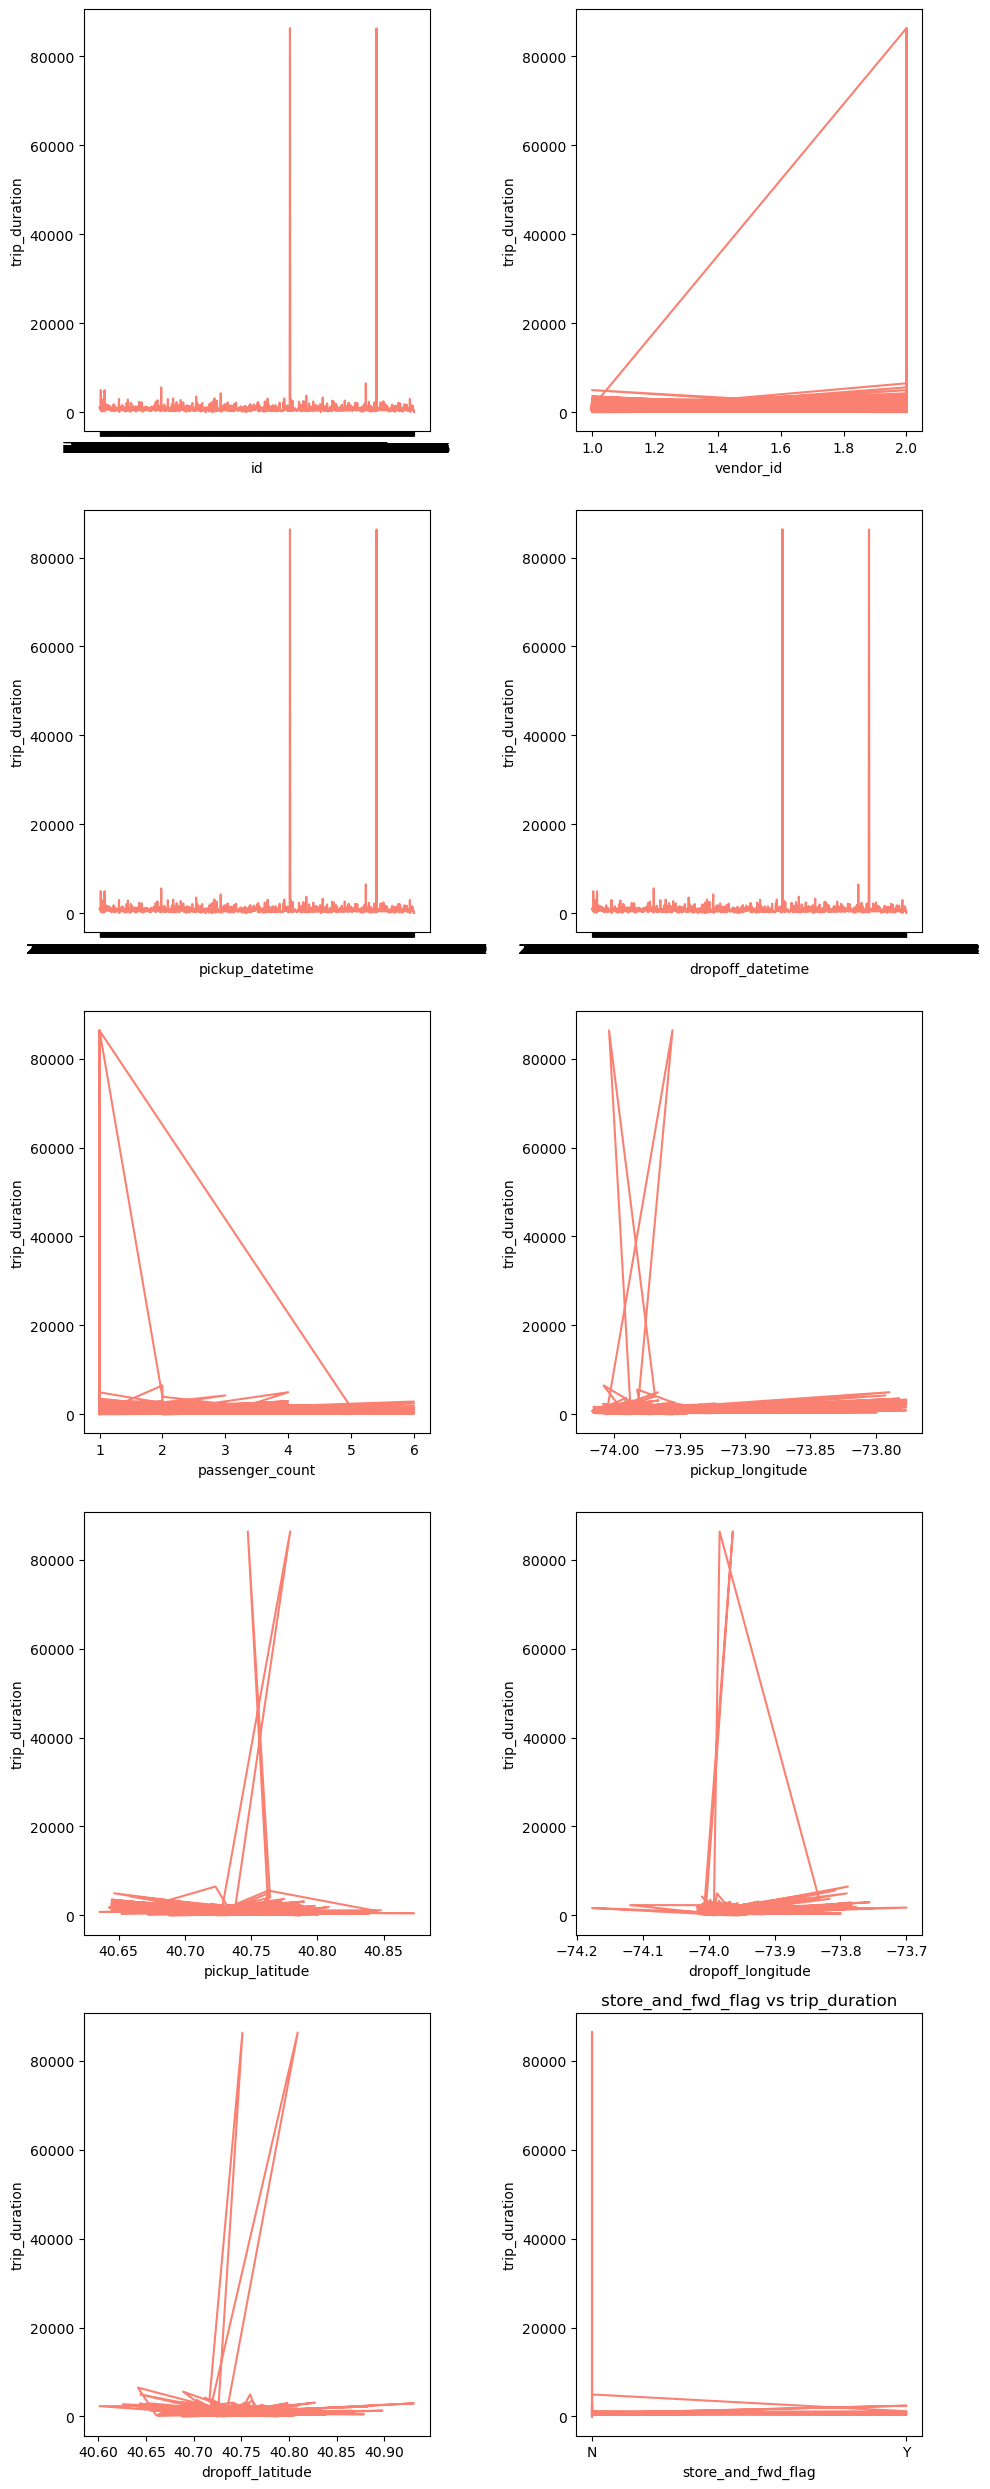

In [8]:
sample_size=1000
sampled_df = data.sample(n=sample_size, random_state=42)
target='trip_duration'
feature_column=[col for col in data.columns if col!=target]
rows=5
cols=2
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(10,5*rows))
for i, feature in enumerate(feature_column):
    row=i//cols
    col=i%cols
    ax=axes[row,col]
    ax.plot(sampled_df[feature],sampled_df[target],color='salmon')
    plt.title(f'{feature} vs {target}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
plt.tight_layout()
plt.show()

**Showcasing the outliers**

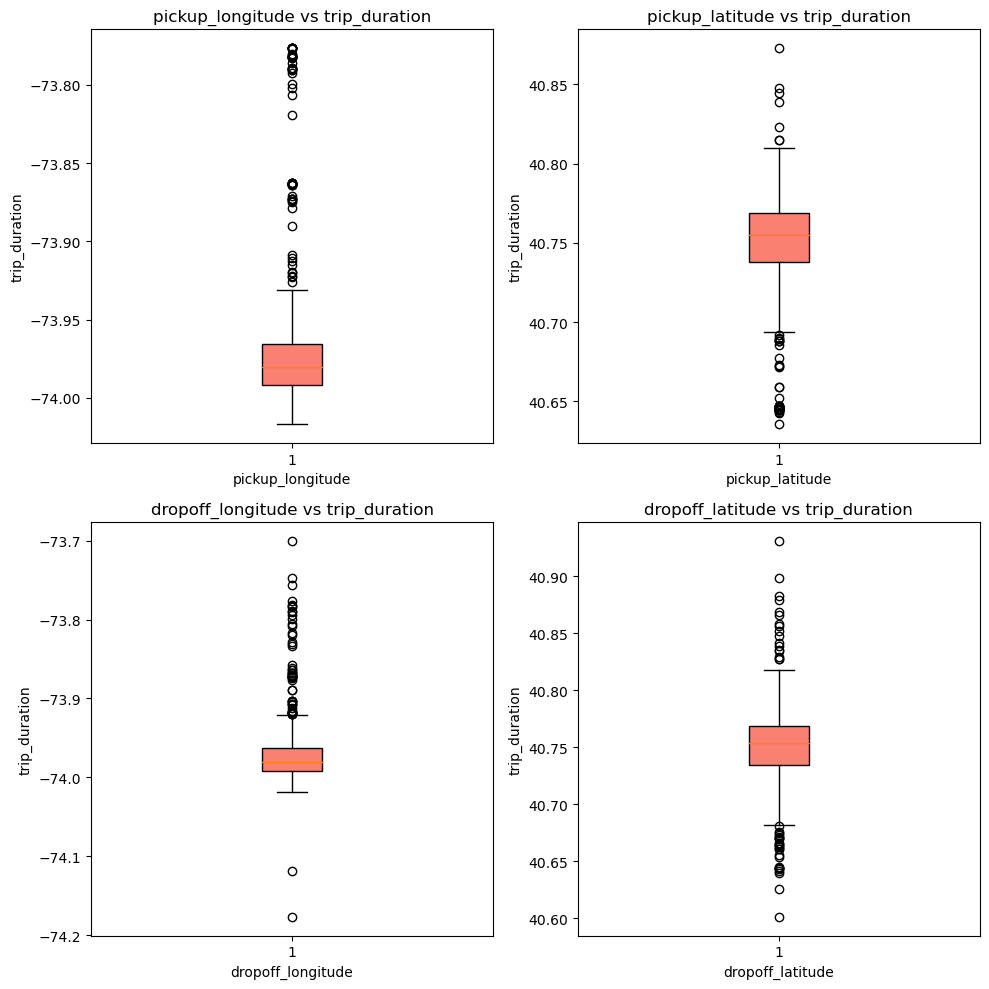

In [9]:
sample_size = 1000
sampled_df = data.sample(n=sample_size, random_state=42)
target = 'trip_duration'
rows = 2
cols = 2
feature_column =['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5 * rows))

for i, feature in enumerate(feature_column):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    
    # Plot box plot instead of line plot
    ax.boxplot(sampled_df[feature],patch_artist=True,boxprops=dict(facecolor='salmon'))
    
    # Set title, x-label, and y-label
    ax.set_title(f'{feature} vs {target}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()


**Number of Outliers for pickup_longitude pickup_latitude dropoff_longitude dropoff_latitude**

In [10]:
feature_column =['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']
for column_name in feature_column:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    print(outliers.shape)

(84322, 11)
(52743, 11)
(77969, 11)
(71990, 11)


# Data Preprocessing 

**Formating `pickup_datetime` and `dropoff_datetime` into datetime format** 

In [11]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
data["dropoff_datetime"] = pd.to_datetime(data["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

In [12]:
data["pickup_month"] = data["pickup_datetime"].dt.month
data["pickup_day"] = data["pickup_datetime"].dt.day
data["pickup_weekday"] = data["pickup_datetime"].dt.weekday 
data["pickup_hour"] = data["pickup_datetime"].dt.hour
data["pickup_minute"] = data["pickup_datetime"].dt.minute

In [13]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,0,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,2,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,5,13,30


In [14]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [15]:
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [16]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [17]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,0,17,24,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,6,0,43,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,1,11,35,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,2,19,32,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,5,13,30,1.188590,9.836608


In [18]:
data.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [19]:
data = pd.get_dummies(data, columns=['store_and_fwd_flag'], prefix=['store_and_fwd'])
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,distance,speed,store_and_fwd_N,store_and_fwd_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,24,1.498523,11.856445,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,43,1.805510,9.803672,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,35,6.385107,10.822216,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,32,1.485500,12.465738,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,30,1.188590,9.836608,1,0


* **Passengers**

In [20]:
data.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

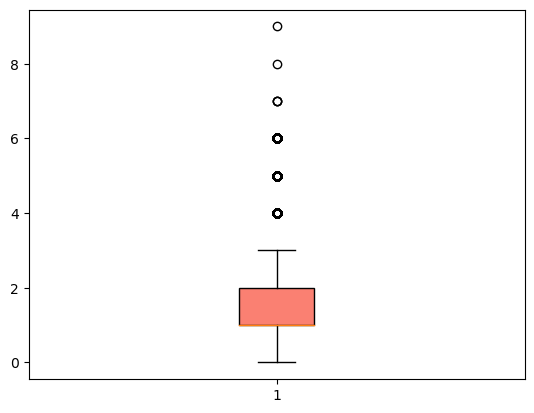

In [21]:
plt.boxplot(data.passenger_count,patch_artist=True,boxprops=dict(facecolor='salmon'))
plt.show()

**Observations**

* There are 60 trips with 0 passengers.
* There are 3,1 and 1 trips with 7,8,9 passengers.
* Most of the trips have 1,2 and 5.



It is impractical for a cab to have 0 passengers during a trip, this can be possible only if the driver forgot to add the number of passengers into the database.

In [22]:
data.passenger_count.describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

Mean, Median and Mode for data is approximately 1. Hence we can simply replace the datapoints having 0 passenger_count to have passenger_count=1.

In [23]:
data['passenger_count']=data.passenger_count.map(lambda x:1 if x==0 else x)

Datapoints with 7,8 and 9 passengers are too extreme and can be removed from the dataset.

In [24]:
data=data[data.passenger_count<=6]

In [25]:
data.passenger_count.value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

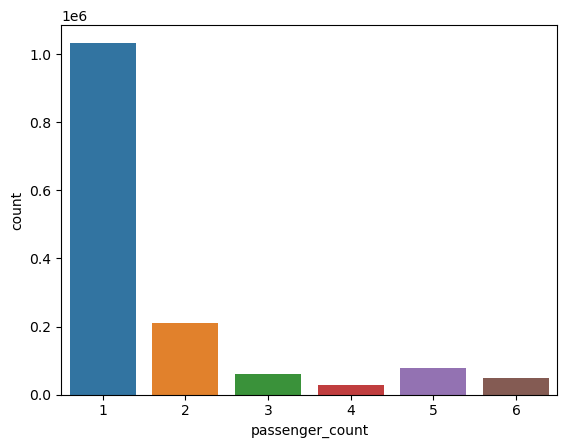

In [26]:
sns.countplot(data,x='passenger_count')

* **Vendor**

In [27]:
data.vendor_id.value_counts()

2    780297
1    678342
Name: vendor_id, dtype: int64

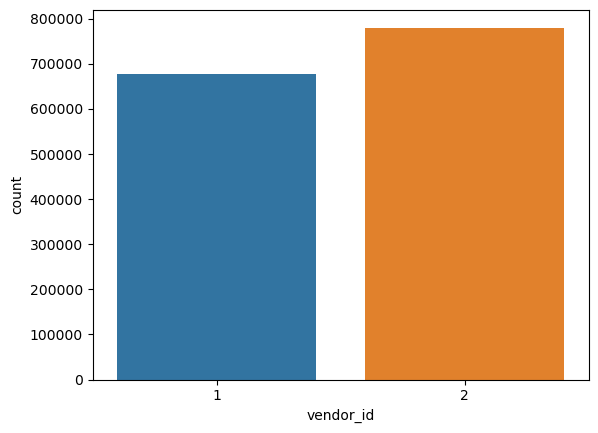

In [28]:
sns.countplot(data=data, x='vendor_id')
plt.show()


Both the vendors have almost the same market share although vendor 2 seems to be more popular amongst the customers.

* **Distance**

In [29]:
data.distance.describe()

count    1.458639e+06
mean     3.440876e+00
std      4.296547e+00
min      0.000000e+00
25%      1.231841e+00
50%      2.093727e+00
75%      3.875344e+00
max      1.240910e+03
Name: distance, dtype: float64

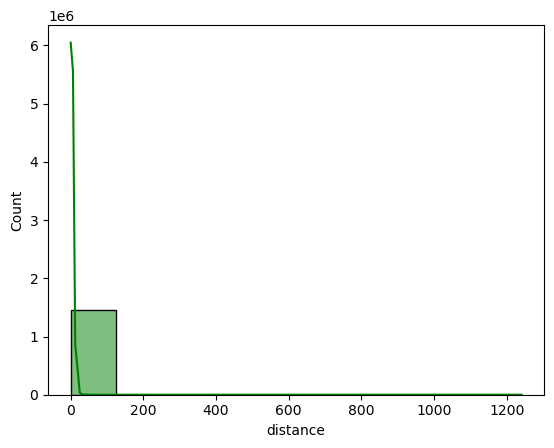

In [30]:
sns.histplot(data,x='distance',bins=10,color='green',kde=True)
plt.show()

* **Trip Duration**

In [31]:
data.trip_duration.describe()

count    1.458639e+06
mean     9.594951e+02
std      5.237440e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

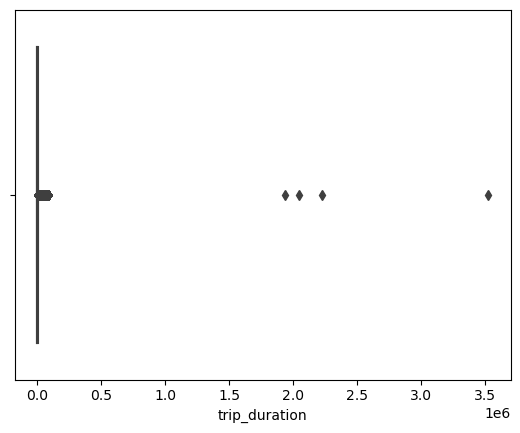

In [32]:
sns.boxplot(data,x='trip_duration')
plt.show()

Some trips are over 1,000,000 seconds long which are clearly outliers. We can remove these outliers for better performance.

In [33]:
data=data[data.trip_duration<=500000]

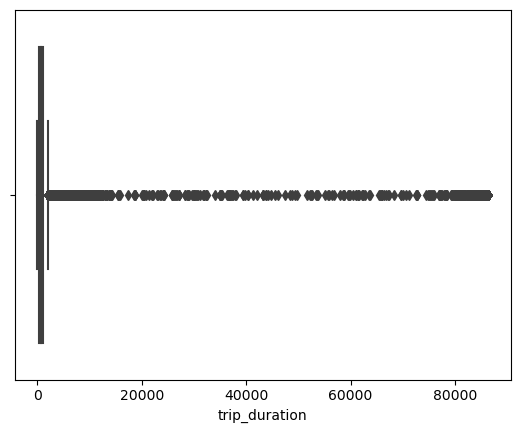

In [34]:
sns.boxplot(data,x='trip_duration')
plt.show()

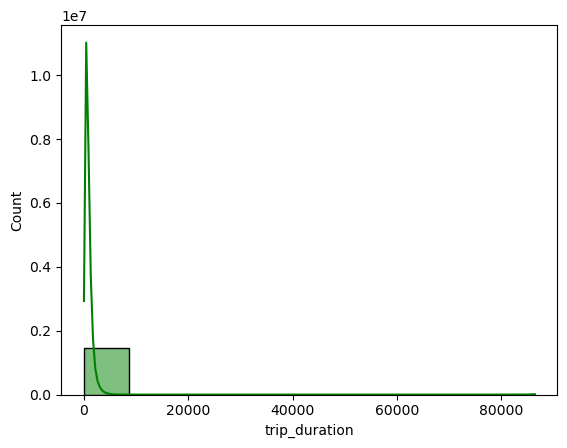

In [35]:
sns.histplot(data,x='trip_duration',bins=10,color='green',kde=True)
plt.show()

* **Speed**

In [36]:
data.speed.describe()

count    1.458635e+06
mean     1.442318e+01
std      1.497671e+01
min      0.000000e+00
25%      9.121368e+00
50%      1.279202e+01
75%      1.784496e+01
max      9.274850e+03
Name: speed, dtype: float64

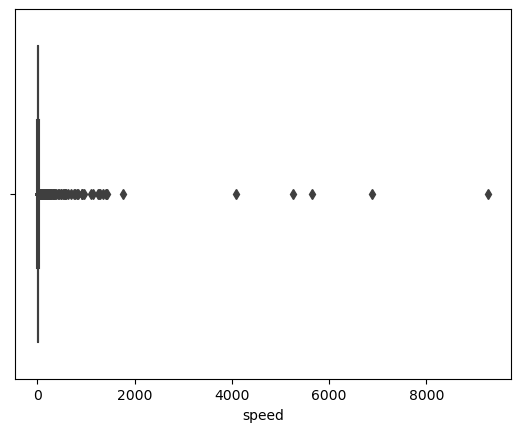

In [37]:
sns.boxplot(data,x='speed')
plt.show()

In [38]:
data[data.speed>=200].shape

(67, 19)

There are 67 datapoints that are running on an average speed greater than 200, which is impractical. Hence we can remove such datapoints.

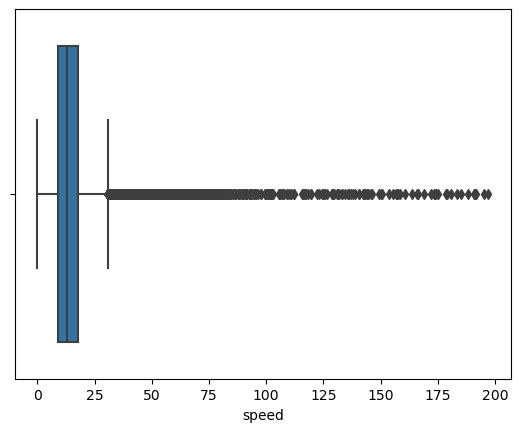

In [39]:
data=data[data.speed<=200]
sns.boxplot(data,x='speed')
plt.show()

Most trips are completed with an average speed of 10-20 kmph.

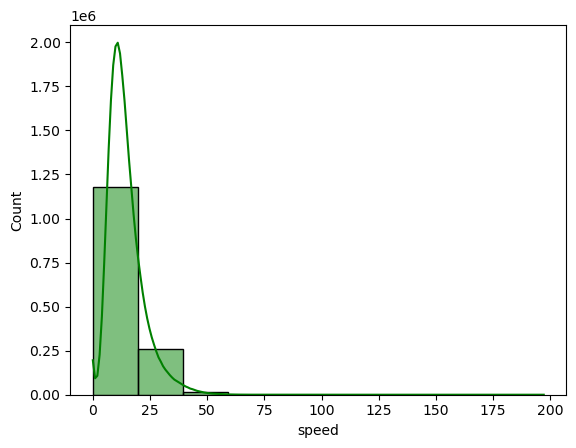

In [40]:
sns.histplot(data,x='speed',bins=10,color='green',kde=True)
plt.show()

* **Store_and_fwd_flag**

In [41]:
data.store_and_fwd_Y.value_counts(normalize=True)

0    0.994484
1    0.005516
Name: store_and_fwd_Y, dtype: float64

In [42]:
data[data.store_and_fwd_Y==1].head(15)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,distance,speed,store_and_fwd_N,store_and_fwd_Y
348,id1633648,1,2016-06-20 14:19:16,2016-06-20 14:19:16,1,-73.977905,40.754871,-73.952774,40.768166,918,6,20,0,14,19,2.581730,10.124431,0,1
491,id2042535,1,2016-02-12 12:36:38,2016-02-12 12:36:38,1,-73.978981,40.756519,-73.992165,40.749203,629,2,12,4,12,36,1.376632,7.878975,0,1
610,id0909228,1,2016-05-08 15:02:28,2016-05-08 15:02:28,1,-73.988510,40.742935,-74.010620,40.723507,926,5,8,6,15,2,2.852653,11.090227,0,1
774,id3697489,1,2016-01-13 13:53:29,2016-01-13 13:53:29,1,-73.948982,40.781578,-73.982346,40.778923,892,1,13,2,13,53,2.824636,11.399877,0,1
846,id1026973,1,2016-06-25 21:53:30,2016-06-25 21:53:30,1,-73.982628,40.762341,-73.995537,40.749779,717,6,25,5,21,53,1.770124,8.887650,0,1
854,id1872397,1,2016-06-05 11:44:54,2016-06-05 11:44:54,1,-73.948029,40.774792,-73.965942,40.765343,697,6,5,6,11,44,1.838393,9.495284,0,1
1014,id3003058,1,2016-05-08 02:32:00,2016-05-08 02:32:00,1,-73.996353,40.766544,-73.936417,40.693886,2113,5,8,6,2,32,9.527918,16.233082,0,1
1031,id1211472,1,2016-05-12 14:11:19,2016-05-12 14:11:19,1,-73.951576,40.791344,-73.789146,40.641678,3117,5,12,3,14,11,21.549096,24.888273,0,1
1115,id2453193,1,2016-03-19 11:25:03,2016-03-19 11:25:03,4,-73.977554,40.752651,-73.988174,40.757229,365,3,19,5,11,25,1.029225,10.151259,0,1
1336,id0775739,1,2016-03-24 16:05:47,2016-03-24 16:05:47,1,-73.980995,40.733528,-73.965248,40.754742,756,3,24,3,16,5,2.706293,12.887111,0,1


Less than 1% of the of the trips are stored in the vehicle prior the server. There isn't much connection with the trip storage and time duration. 

* **pickup_hour**

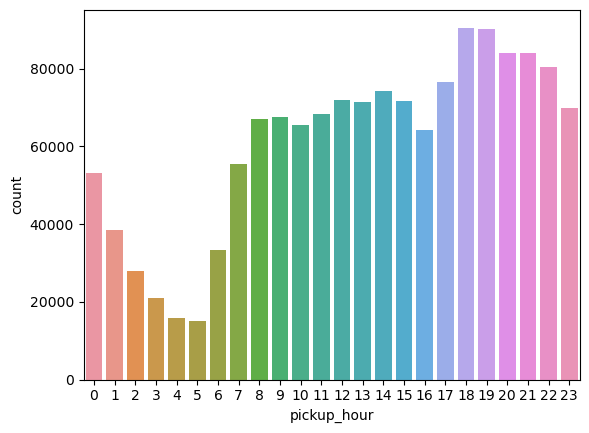

In [43]:
sns.countplot(data,x="pickup_hour")
plt.show()

This graph follows a very common traffic trend i.e. there is incline in pickups during morning hours after 6, and there is decline in pickup_hour after peak ttraffic hours - after 7.

* **pickup_minute**

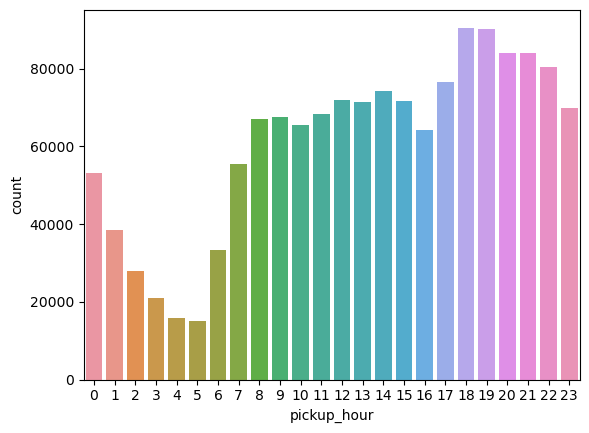

In [44]:
sns.countplot(data,x="pickup_hour")
plt.show()

There are trends in this graph, but analysis of these trends is not that important.

* **pickup_month**

In [45]:
data.pickup_month.value_counts()

3    256181
4    251636
5    248473
2    238288
6    234298
1    229692
Name: pickup_month, dtype: int64

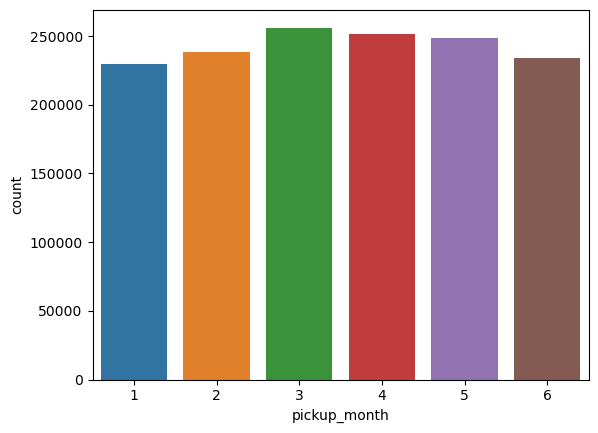

In [46]:
sns.countplot(data,x="pickup_month")
plt.show()

pickup_month does not help much in prediction of trip_duration as the values are quite close to each other and not many trends can be observed.

* **pickup_weekday**

In [47]:
data.pickup_weekday.value_counts()

4    223524
5    220858
3    218558
2    210129
1    202742
6    195347
0    187410
Name: pickup_weekday, dtype: int64

[]

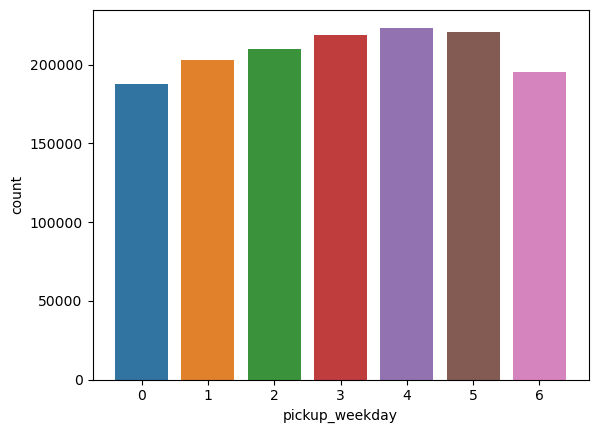

In [48]:
sns.countplot(data,x='pickup_weekday')
plt.plot()

Here we see a trend that tere is incline in graph from monday to friday and decline from friday to sunday, which is natural since office going people won't be hiring taxis for compute on weekends.`

D:\Python\env\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


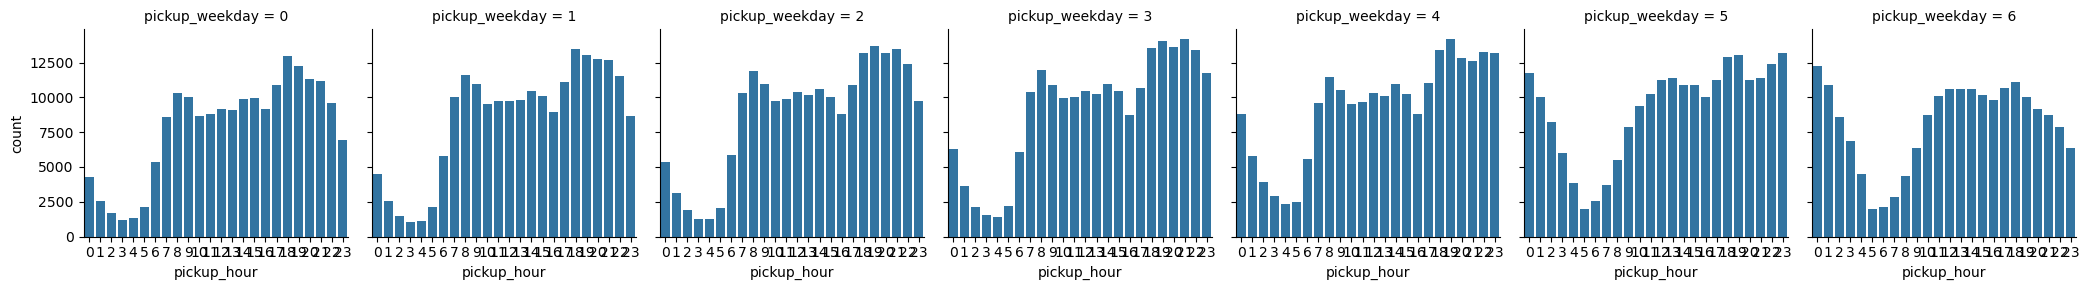

In [49]:
n=sns.FacetGrid(data,col='pickup_weekday')
n.map(sns.countplot,'pickup_hour')
plt.show()

There are more late night trips during weekends.

# Data Visulaization

**Let us analyse the distribution of `trip_duration` accross different variables.**

* **Trip Duration per Hour**



Grouping the dataset by pickup_hour column, and calculating average of trip duration for each group and creating a point plot.

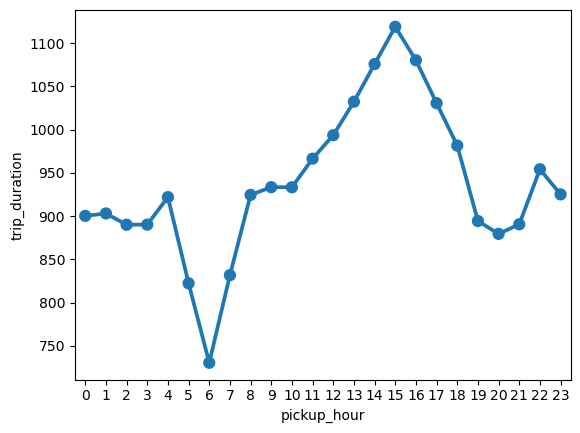

In [50]:
g1=data.groupby('pickup_hour')['trip_duration'].mean().reset_index()
sns.pointplot(data=g1,x='pickup_hour',y='trip_duration')
plt.show()

**Observation:**
   * Average trip duration is lowest at 6 A.M. and highest at 3 P.M. .
   * The average trip duration is sort of similar before 5 A.M. and after 6 P.M. .
    

* **Trip Duration per Weekday**

[]

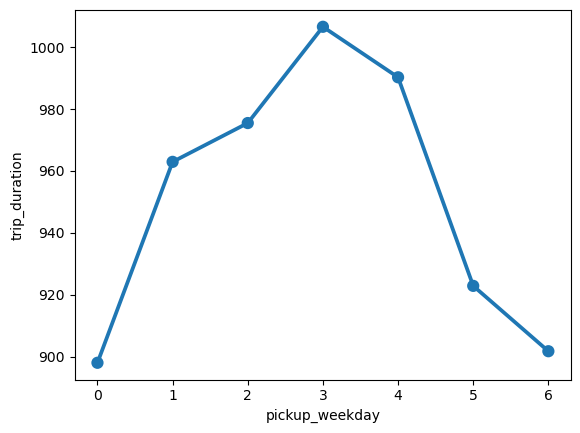

In [51]:
g2=data.groupby('pickup_weekday')['trip_duration'].mean().reset_index()
sns.pointplot(data=g2,x='pickup_weekday',y='trip_duration')
plt.plot()

**Observation:**
   * The trip duration is lowest on monday and sunday.
   * The trip duration is highest on thursday.

* **Trip Duration per Month**

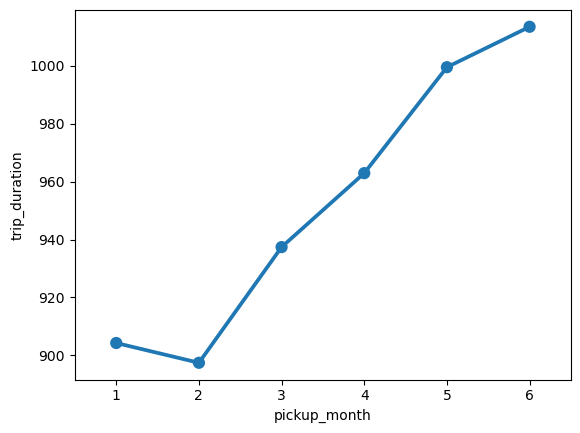

In [52]:
g3=data.groupby('pickup_month')['trip_duration'].mean().reset_index()
sns.pointplot(data=g3,x='pickup_month',y='trip_duration')
plt.show()

**Observation:**
* Average trip duration is minimum in February.
* Average trip duration is maximum in June. 
* Although the difference in average trip duration is not much.
* There might be some seasonal changes contibuting to variance in trip duration.

* **Trip Duration per vendor**

[]

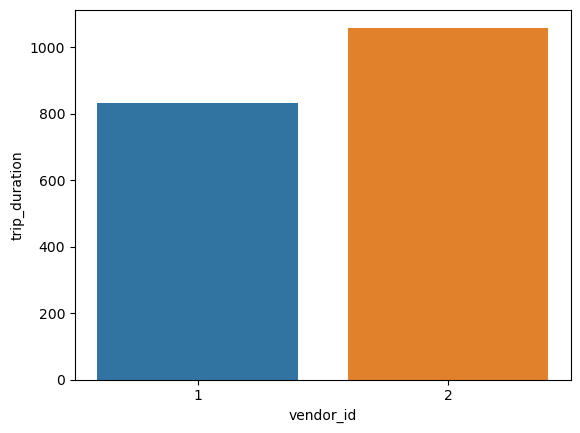

In [53]:
g4=data.groupby('vendor_id')['trip_duration'].mean().reset_index()
sns.barplot(data=g4,x='vendor_id',y='trip_duration')
plt.plot()

* **Trip Duration v/s Flag**

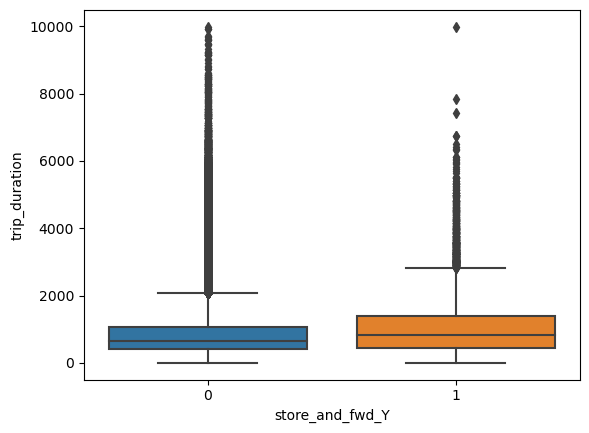

In [54]:
g5=data[data['trip_duration']<=10000]
sns.boxplot(data=g5,x='store_and_fwd_Y',y='trip_duration')
plt.show()

**Observations:**
* The trip duration scale for trips that were stored before the server is less.
* The trip duration for trips in which the trip is not stored before the server is more.
* The interquartile range for stored trips is more.
* The outliers for the trips that are not stored are more.

**Let us analyse the distribution of `distance` accross several variables.**


* **Distance per pickup_hour**

We can analyse the data grouped w.r.t. pickup_hour and the average distance travelled during the trip in that group. 

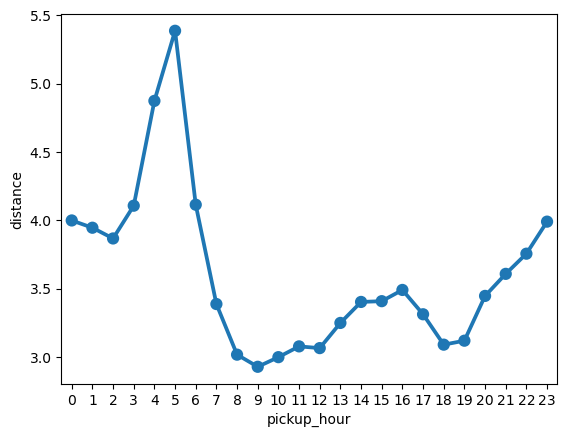

In [55]:
g6=data.groupby('pickup_hour')['distance'].mean().reset_index()
sns.pointplot(data=g6,x="pickup_hour",y="distance")
plt.show()

**Observation:**
* The largest distance travelled is at 5 A.M. 
* The smallest distance travelled is at 9 A.M.
* The trips covering larger distances are planned during the morning.

* **Distance per Weekday**

We can analyse the data grouped w.r.t. pickup_weekday and the average distance travelled during the trip in that group. 

[]

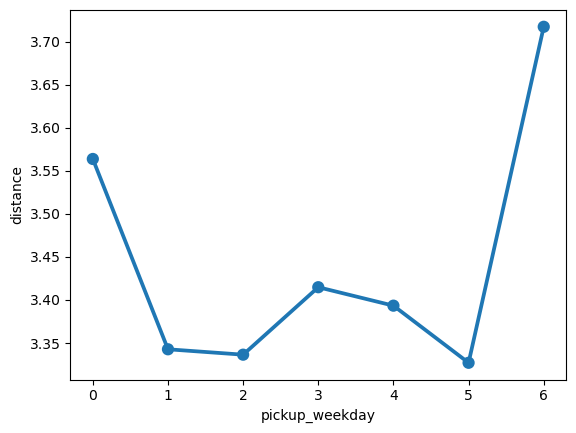

In [56]:
g7=data.groupby('pickup_weekday')['distance'].mean().reset_index()
sns.pointplot(data=g7,x='pickup_weekday',y='distance')
plt.plot()

**Observations:**

* Largest distances are travelled on Sundays and Mondays, i.e. 3.7km and 3.57 km.
* The least distances are travelled on tuesdays and fridays. 


* **Distance Per Month**

We can analyse the data grouped w.r.t. pickup_month and the average distance travelled during the trip in that group.

[]

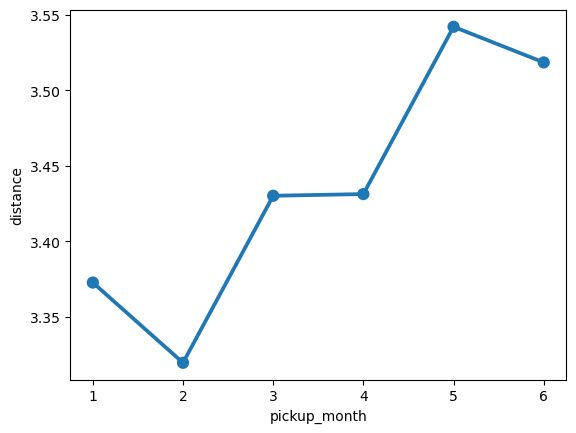

In [57]:
g8=data.groupby('pickup_month')['distance'].mean().reset_index()
sns.pointplot(data=g8,x='pickup_month',y='distance')
plt.plot()

**Observations:**
* The least distance is covered in the month of February.
* The largest distance is covered in the month of May.
* There isn't much variation in the distances travelled in the different months.

* **Distance per Vendor**

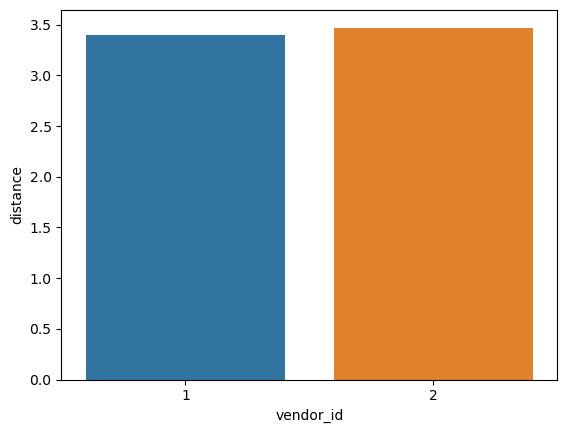

In [58]:
g9=data.groupby('vendor_id')['distance'].mean().reset_index()
sns.barplot(data=g9,x='vendor_id',y='distance')
plt.show()

**Observation:**

The average distances covered by the two vendors is equal.

* **Distance v/s Flag**

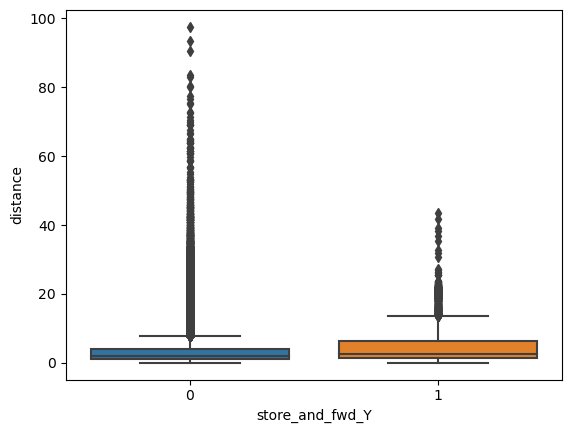

In [59]:
g10=data[data['distance']<=100]
sns.boxplot(data=g10,x='store_and_fwd_Y',y='distance')
plt.show()

**Observation:**

The observation from the above plot is very similar to the ovservations from trip_duration vs flag.

* **Distance vs Time Duration**

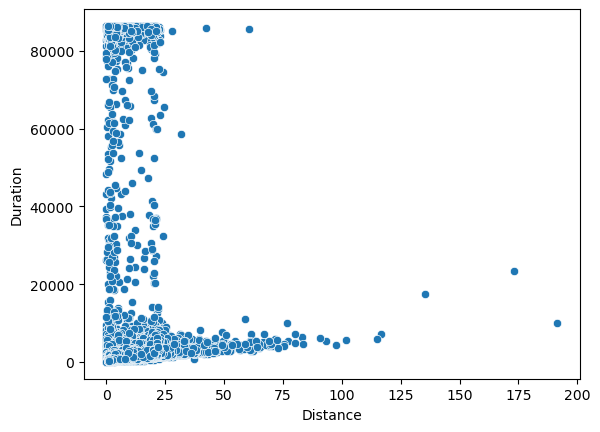

In [60]:
sns.scatterplot(data=data,x=data.distance,y=data.trip_duration)
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.show()

**Observations:**
    
* There are many trips that hardly cover any distance and take up alot of time.
* There are a few trips that cover a lot of distance, in less time. This is impractical and it should be treated as outliers. 

Let's focus on the part of the graph where distance<50km and duration<10000

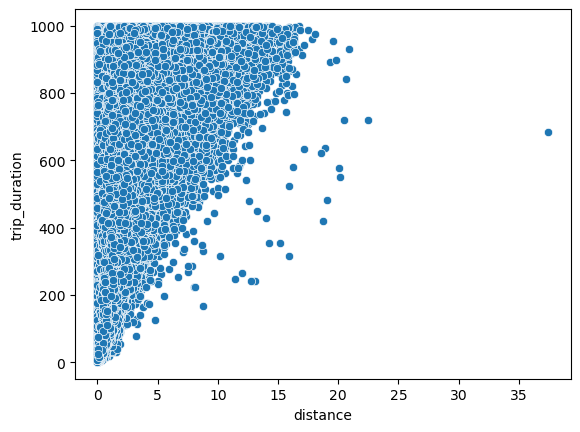

In [61]:
g11=data[(data['distance']<50) & (data['trip_duration']<1000)]
sns.scatterplot(data=g11,x='distance',y='trip_duration')
plt.show()

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the top left corner which showcase many trips with the inconsistent readings.

We should remove all those datapoints that consist of distance = 0 km and trip_duration<60 seconds.

In [62]:
data=data[(data.distance !=0) & (data.trip_duration>60)]

Now, Instead of looking at each and every trip, we should approximate and try to filter those trips which covered less than 1 km distance and but clocked more than an hour.

In [63]:
data=data[~((data.distance<=1) & (data.trip_duration>=3600))]

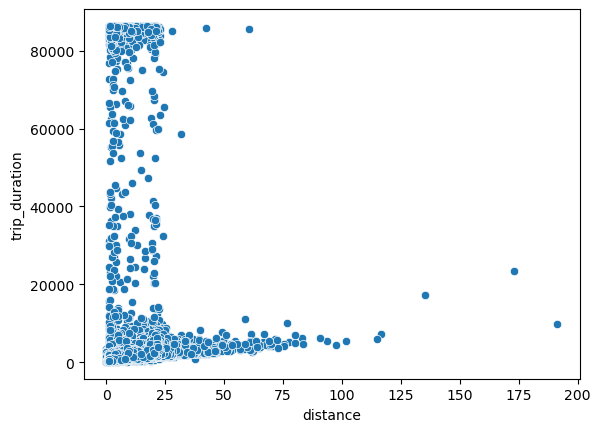

In [64]:
sns.scatterplot(data=data,x='distance',y='trip_duration')
plt.show()

**Let us analyse the distribution of `speed` accross several variables.**

* **Average speed per pick_hour**

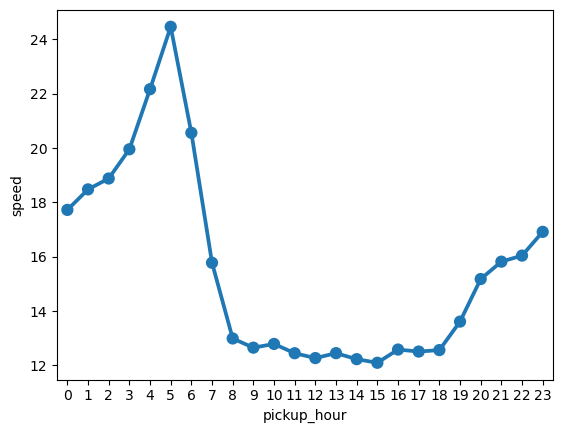

In [65]:
g12=data.groupby('pickup_hour').speed.mean().reset_index()
sns.pointplot(data=g12,x='pickup_hour',y='speed')
plt.show()

**Observations:**

   * The average speed of commute is maximum at 5 A.M.
   * The average speed of commute is minimum between 8 A.M. to 6 P.M.
   * There is sharp change in average speed between 5 A.M. to 8 A.M.
   * The average speed of commute is steady between 8 A.M. to 6 P.M.





* **Average Speed per Weekday**

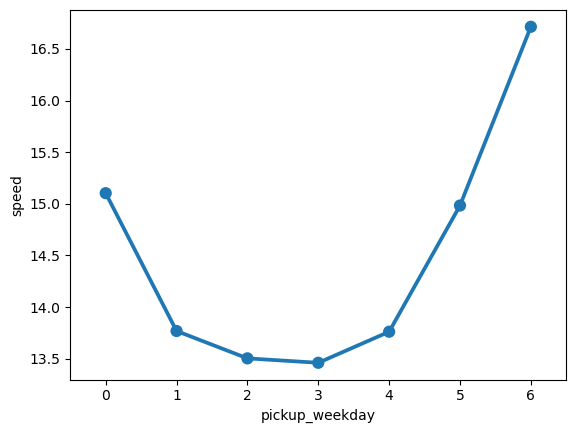

In [66]:
g13=data.groupby('pickup_weekday').speed.mean().reset_index()
sns.pointplot(data=g13,x='pickup_weekday',y='speed')
plt.show()

**Observations:**
* The average speed of commute declines from monday to wednesday.
* The average speed of commute increases from thursday to sunday.
* The average speed of commute is maximum on Sunday.
* The average speed of commute is minimum on Wednesday and Thursday.




* **Average Speed per Month**

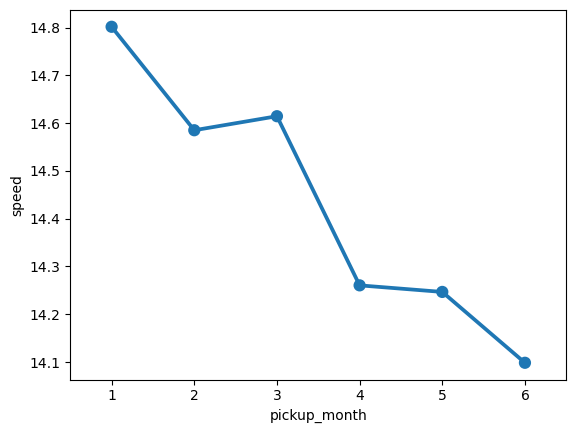

In [67]:
g14=data.groupby('pickup_month').speed.mean().reset_index()
sns.pointplot(data=g14,x='pickup_month',y='speed')
plt.show()

**Observation:**
There is not much difference in average speed over a month.

* **Passanger Count Per Vendor**

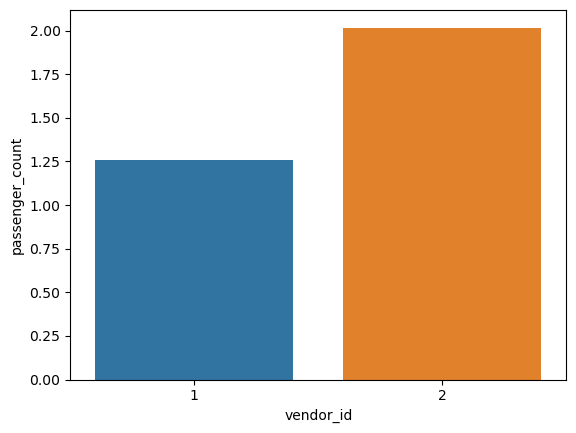

In [68]:
g15=data.groupby('vendor_id').passenger_count.mean().reset_index()
sns.barplot(data=g15,x='vendor_id',y='passenger_count')
plt.show()

* **Map Visualization**

In [69]:
def map_marker(data):
    
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize=(10,10))
    
    lat_min=data["pickup_latitude"].min()-.2
    lat_max=data["pickup_latitude"].max()+.2
    lon_min=data["pickup_longitude"].min()-.2
    lon_max=data["pickup_longitude"].max()+.2
    
    cent_lat=(lat_min+lat_max)/2
    cent_lon=(lon_min+lon_max)/2
    
    map=Basemap(llcrnrlon=lon_min,
               llcrnrlat=lat_min,
               urcrnrlon=lon_max,
               urcrnrlat=lat_max,
               resolution='l',
               projection='tmerc',
               lat_0 = cent_lat,
               lon_0 = cent_lon)
    
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()
    
    long=data["pickup_longitude"].values
    lat=data["pickup_latitude"].values
    
    x,y=map(long,lat)
    map.plot(x,y,'ro',markersize=2,alpha=1)
    plt.show()

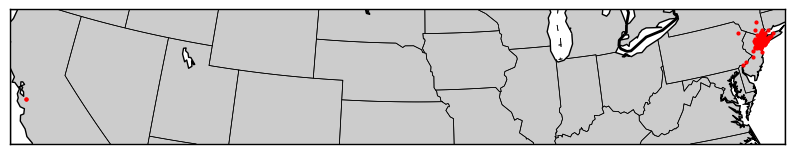

In [70]:
map_marker(data)

Most of the trips are booked in New York but there is an outlier booking in the state of california. To obtain the details of the outlier data value- where the pickup is made from California is:

In [71]:
data[data.pickup_longitude == data.pickup_longitude.min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,distance,speed,store_and_fwd_N,store_and_fwd_Y
1184454,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:50:19,2,-121.933342,37.389381,-121.933304,37.389511,499,2,26,4,13,50,0.014811,0.106849,1,0


**Observation**

The trip booked in California covers only around 1.5 meter distance in more than 8 minutes. This distance is almost neglible.

In [72]:
data=data[data.pickup_longitude != data.pickup_longitude.min()]

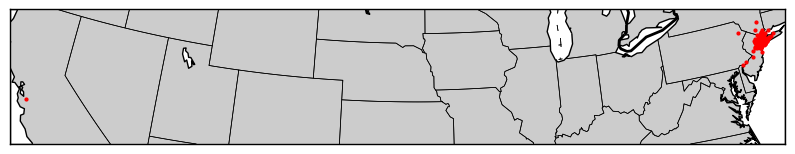

In [73]:
map_marker(data)

There is still a pickup from California.

In [74]:
data[data.pickup_longitude==data.pickup_longitude.min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,distance,speed,store_and_fwd_N,store_and_fwd_Y
1068810,id3777240,2,2016-01-27 18:26:40,2016-01-27 18:26:40,2,-121.933235,37.389297,-121.933205,37.389103,1105,1,27,2,18,26,0.0218,0.071024,1,0


**Observation**

The trip booked in California covers only around 2 meters of distance in more than 11 minutes. This distance is almost neglible.

In [75]:
data=data[data.pickup_longitude!=data.pickup_longitude.min()]

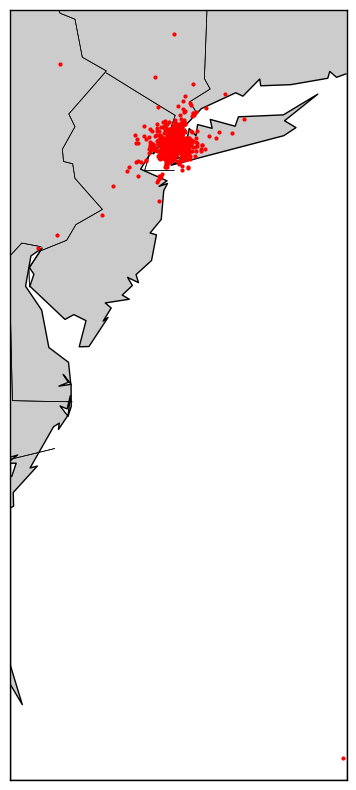

In [76]:
map_marker(data)

**Observations:**

* There are some pickup destination off the shore of USA i.e. in the Atlantic Ocean. 
* Most of the points lie in the premises of USA and NYC.

Therefore we would proceed without eliminating these offshore datapoints since it is a very cumbersome task.

# Data Modelling



**Feature Selection**

In [77]:
list(zip(range(0,len(data.columns)),data.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'trip_duration'),
 (10, 'pickup_month'),
 (11, 'pickup_day'),
 (12, 'pickup_weekday'),
 (13, 'pickup_hour'),
 (14, 'pickup_minute'),
 (15, 'distance'),
 (16, 'speed'),
 (17, 'store_and_fwd_N'),
 (18, 'store_and_fwd_Y')]

In [78]:
y = data[['trip_duration']]
X = data[['passenger_count', 'pickup_month', 'pickup_day', 'pickup_weekday', 'pickup_hour', 'distance', 'store_and_fwd_N', 'store_and_fwd_Y']]

Let's append an array of all 1's to the feature set.

In [79]:
X1=np.append(arr=np.ones((X.shape[0],1)).astype(int),values=X,axis=1)
X1.shape

(1445184, 9)

In [80]:
X_opt=X1[:,range(0,9)]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
p_vals=regressor_OLS.pvalues
sig_level=0.05

while max(p_vals)>sig_level:
    print("Probability values of each feature.\n")
    print(p_vals)
    X_opt=np.delete(X_opt,np.argmax(p_vals),axis=1)
    print("\n")
    print("Feature at index {} is removed.\n".format(str(np.argmax(p_vals))))
    print(str(X_opt.shape[1]-1)+ " dimensions remaining now.\n")
    regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
    p_vals=regressor_OLS.pvalues
    print("=================================================================================================================")

print("Final start summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Final start summary with optimal 8 features


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     7105.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:42:01   Log-Likelihood:            -1.3572e+07
No. Observations:             1445184   AIC:                         2.714e+07
Df Residuals:                 1445176   BIC:                         2.714e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        184.2007     12.832     14.355      0.000     159.050     209.351
x1            26.3250      1.836     14.337      0.000      22.726      29.924
x2            20.4267      1.435     14.230      0.000      17.613      23.240
x3             0.6513      0.277      2.350      0.019       0.108       1.195
x4            -3.8638      1.239     -3.117      0.002      -6.293      -1.434
x5             4.3651      0.378     11.534      0.000       3.623       5.107
x6           135.0250      0.610    221.413      0.000     133.830     136.220
x7           115.8585     11.516     10.061      0.000      93.288     138.429
x8            68.3422     22.064      3.097      0.002      25.098     111.586
==============================================================================
Omnibus:                  3632168.890   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      40199212819.498
Skew:                          28.234   Prob(JB):                         0.00
Kurtosis:                     818.104   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.39e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observation:**

Now we have the optimal set of features.

In [81]:
# Splitting raw data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
# Splitting optimal dataset
X_train_fs,X_test_fs,y_train_fs,y_test_fs=train_test_split(X_opt,y,test_size=0.1,random_state=42)

**Feature Extraction**

We will use PCA for feature extraction i.e. Principal Component Analysis.

In [82]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X,y,random_state=42,test_size=0.1)

In [83]:
scaler=StandardScaler()
X_train_pca=scaler.fit_transform(X_train_pca)
X_test_pca=scaler.fit_transform(X_test_pca)

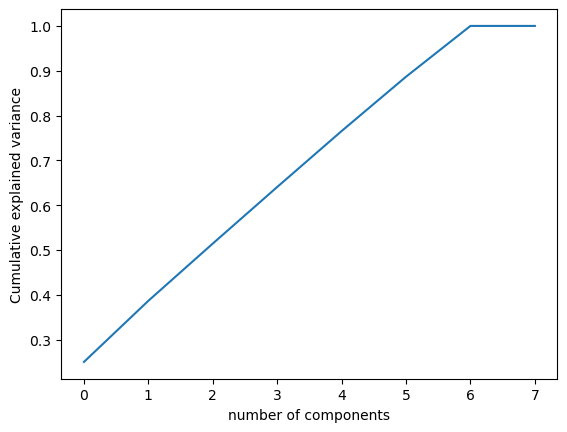

In [84]:
pca=PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [85]:
arr=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
list(zip(range(1,len(arr)),arr))

[(1, 25.03),
 (2, 38.67),
 (3, 51.440000000000005),
 (4, 64.06),
 (5, 76.54),
 (6, 88.66000000000001),
 (7, 99.99000000000001)]

**Observation:**


Here we can see that almost 7 variables are needed for capturing atleast 95% of the variance in the training dataset. Hence we will use the same set of variables.

In [86]:
pca_10=PCA(n_components=7)
X_train_pca=pca_10.fit_transform(X_train_pca)
X_test_pca=pca_10.fit_transform(X_test_pca)

**Correlation Analysis:**

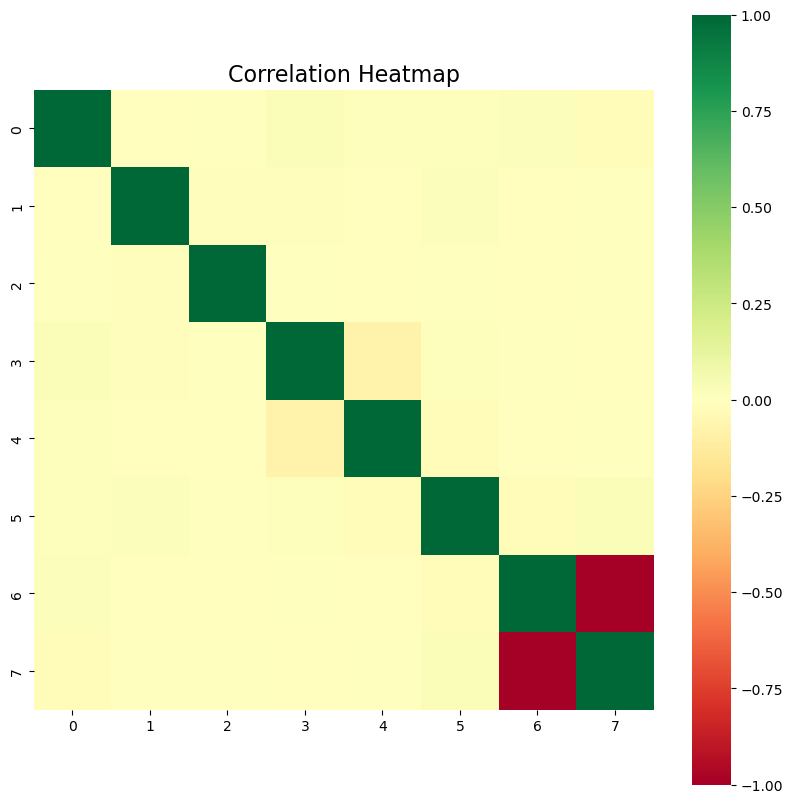

In [87]:
plt.figure(figsize=(10,10))
corr=pd.DataFrame(X_train_fs[:,1:]).corr()
corr_index=pd.DataFrame(X_train_fs).columns
sns.heatmap(corr,cmap='RdYlGn',vmin=-1,vmax=1,square=True)
plt.title("Correlation Heatmap",fontsize=16)
plt.show()

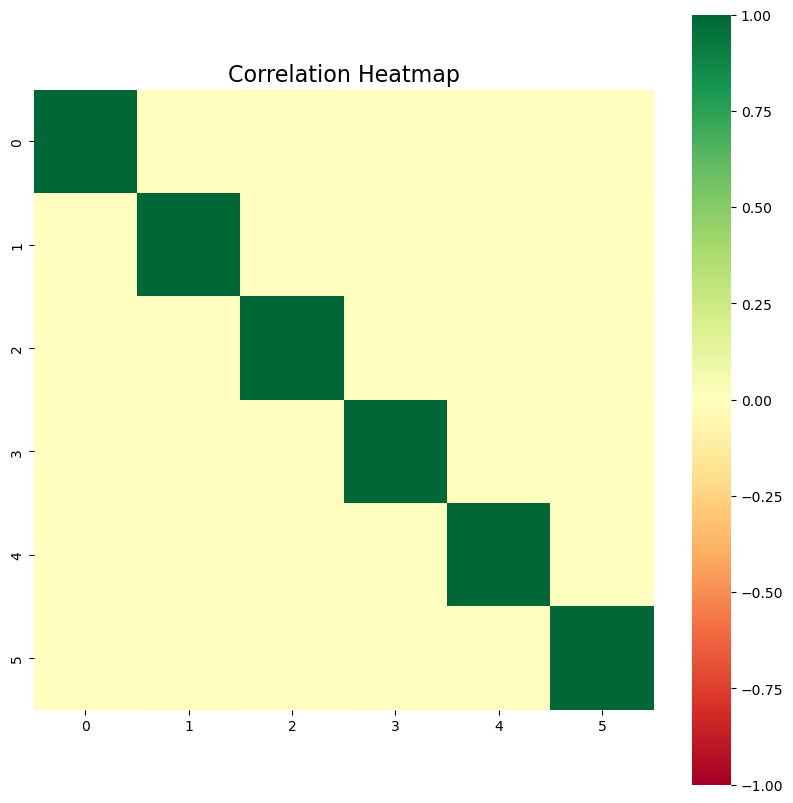

In [88]:
plt.figure(figsize=(10,10))
corr=pd.DataFrame(X_train_pca[:,1:]).corr()
corr_index=pd.DataFrame(X_train_pca).columns
sns.heatmap(corr,cmap='RdYlGn',vmin=-1,vmax=1,square=True)
plt.title("Correlation Heatmap",fontsize=16)
plt.show()

**Observation:**
    
All the features show little to no correlation because feature extraction removes all collinearity.

**Model**

* **Multiple Linear Regression**

In [89]:
# Linear Regression with raw data
regressor=LinearRegression()
regressor.fit(X_train,y_train)

# Linear Regression with feature selection group
regressor1=LinearRegression()
regressor1.fit(X_train_fs,y_train_fs)

# Linear Regression with feature extraction group
regressor2=LinearRegression()
regressor2.fit(X_train_pca,y_train_pca)

LinearRegression()

In [90]:
y_pred=regressor.predict(X_test)
y_pred_fs=regressor1.predict(X_test_fs)
y_pred_pca=regressor2.predict(X_test_pca)

In [91]:
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('RMSE score for the Multiple LR raw is : {}'.format(mean_absolute_error(y_test,y_pred)))
print("\n")

#Evaluate the regressor on the Feature selection group
print('RMSE score for the Multiple LR FS is : {}'.format(np.sqrt(mean_squared_error(y_test_fs,y_pred))))
print('RMSE score for the Multiple LR FS is : {}'.format(mean_absolute_error(y_test_fs,y_pred)))
print("\n")

#Evaluate the regressor on the Feature extraction group
print('RMSE score for the Multiple LR PCA is : {}'.format(np.sqrt(mean_squared_error(y_test_pca,y_pred_pca))))
print('RMSE score for the Multiple LR PCA is : {}'.format(mean_squared_error(y_test_pca,y_pred_pca)))


RMSE score for the Multiple LR raw is : 3032.395335420269
RMSE score for the Multiple LR raw is : 422.41277761328723


RMSE score for the Multiple LR FS is : 3032.395335420269
RMSE score for the Multiple LR FS is : 422.41277761328723


RMSE score for the Multiple LR PCA is : 3032.6952186649296
RMSE score for the Multiple LR PCA is : 9197240.289313124


* **XGBoost Regressor**

In [92]:
regressor_xgbraw=xgb.XGBRegressor(n_jobs=-1)

regressor_xgb=xgb.XGBRegressor(n_jobs=-1)

regressor_xgb1=xgb.XGBRegressor(n_estimators=300,
                           learning_rate=0.08,
                           gamma=0,
                           subsample=0.75,
                           colsample_bytree=1,
                           max_depth=7,
                           min_child_weight=4,
                           silent=1,
                           n_jobs=-1)

regressor_xgb2=xgb.XGBRegressor(n_jobs=-1)

regressor_xgbraw.fit(X_train,y_train)

regressor_xgb.fit(X_train_fs,y_train_fs)

regressor_xgb1.fit(X_train_fs,y_train_fs)

regressor_xgb2.fit(X_train_pca,y_train_pca)

D:\Python\env\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:42:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
y_pred_xgbraw=regressor_xgbraw.predict(X_test)

y_pred_xgb=regressor_xgb.predict(X_test_fs)

y_pred_xgb1=regressor_xgb1.predict(X_test_fs)

y_pred_xgb_pca=regressor_xgb2.predict(X_test_pca)

In [94]:
print('RMSE score for the XGBoost regressor raw is : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_xgbraw))))
print('MAE score for the XGBoost regressor raw is : {}'.format(mean_absolute_error(y_test,y_pred_xgbraw)))
print("\n")


print('RMSE score for the XGBoost regressor is : {}'.format(np.sqrt(mean_squared_error(y_test_fs,y_pred_xgb))))
print('MAE score for the XGBoost regressor is : {}'.format(mean_absolute_error(y_test_fs,y_pred_xgb)))
print("\n")


print('RMSE score for the XGBoost regressor1 is : {}'.format(np.sqrt(mean_squared_error(y_test_fs,y_pred_xgb1))))
print('MAE score for the XGBoost regressor1 is : {}'.format(mean_absolute_error(y_test_fs,y_pred_xgb1)))
print("\n")

print('RMSE score for the XGBoost regressor2 is : {}'.format(np.sqrt(mean_squared_error(y_test_pca,y_pred_xgb_pca))))
print('MAE score for the XGBoost regressor2 is : {}'.format(mean_absolute_error(y_test_pca,y_pred_xgb_pca)))

RMSE score for the XGBoost regressor raw is : 3029.3468619186756
MAE score for the XGBoost regressor raw is : 380.1298655882074


RMSE score for the XGBoost regressor is : 3029.3468619186756
MAE score for the XGBoost regressor is : 380.1298655882074


RMSE score for the XGBoost regressor1 is : 3029.794920333961
MAE score for the XGBoost regressor1 is : 383.05317380622836


RMSE score for the XGBoost regressor2 is : 3153.354353416892
MAE score for the XGBoost regressor2 is : 468.43384979674755


In [95]:
test=pd.read_csv("test.csv")

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
test["dropoff_datetime"] = pd.to_datetime(test["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

test["pickup_month"] = test["pickup_datetime"].dt.month
test["pickup_day"] = test["pickup_datetime"].dt.day
test["pickup_weekday"] = test["pickup_datetime"].dt.weekday 
test["pickup_hour"] = test["pickup_datetime"].dt.hour
test["pickup_minute"] = test["pickup_datetime"].dt.minute

def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

test['distance'] = test.apply(lambda x: calc_distance(x), axis = 1)
test.dtypes.reset_index()
test = pd.get_dummies(test, columns=['store_and_fwd_flag'], prefix=['store_and_fwd'])
test= test[['passenger_count', 'pickup_month', 'pickup_day', 'pickup_weekday', 'pickup_hour', 'distance', 'store_and_fwd_N', 'store_and_fwd_Y']]
y_pred_xgbraw=regressor_xgbraw.predict(test)
y_pred_xgbraw


array([ 765.5653,  764.584 ,  357.6271, ..., 1418.4675, 2294.9146,
       1092.0895], dtype=float32)

# Conclusion

* XGBoost proved to be much more efficient in predicting the output. But it takes much more time to train it over the large dataset wih more complexity as compared to the Linear regression model.

* It didn't helped us much to generalize the model by tuning hyper parameters for the RF model as there is not much difference in the RMSE scores of the default model and the tuned model of the feature selection group infact both varies on every iteration and sometimes the tuned model gives poor results than the default model. 

* Feature extraction didn't helped in anyway to improve the RMSE score with any of the regressor models. This shows us that the feature extraction is somewhat not a good technique to preprocess the data before feeding it into the regressor models for the continous target value prediction. Whereas it also depends on the type and features of data that how it behaves with the model.



In [96]:
def learning_curves(estimator, title, features, target, train_sizes, cv, n_jobs=-1):
    plt.figure(figsize = (14,5))
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, scoring = 'neg_mean_squared_error',  n_jobs=n_jobs)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean,'o-', color="r", label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean,'o-', color="g", label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    
    title = 'Learning curves for a ' + title + ' model'
    plt.title(title, fontsize = 18, loc='left')
    
    plt.legend(loc="best")
    
    return plt

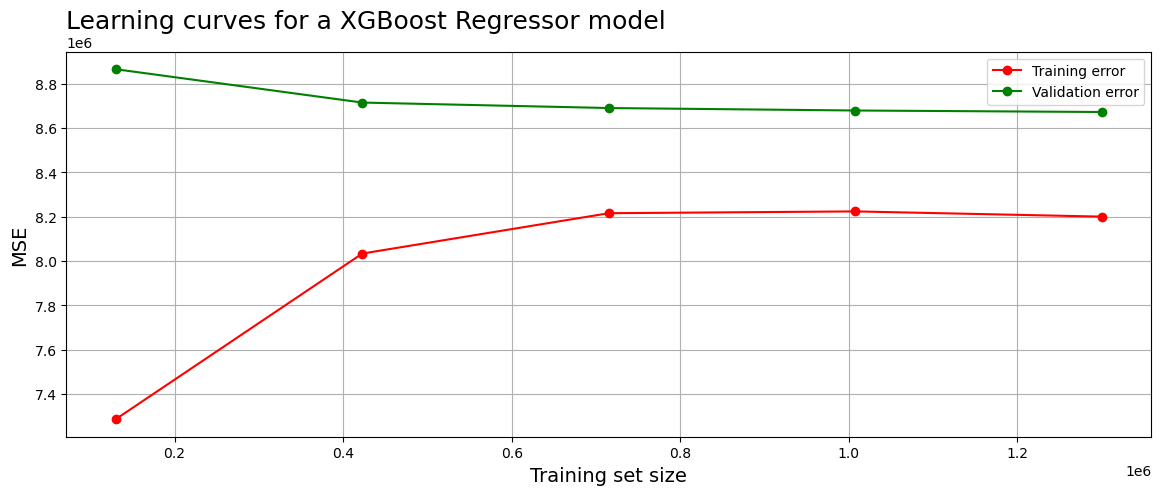

In [97]:
title = "XGBoost Regressor"

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

# Call learning curve on less number of estimators than the tuned estimator because it took too much time for the compilation.
learning_curves(xgb.XGBRegressor(n_estimators=111,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1), title, X_opt,y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)

plt.show()